# Guía 4

## Ejercicio 3

Verifique la propiedad de retardo temporal de la transformada discreta de Fourier. Para ello, genere una señal senoidal de 10 Hz, muestreada a 100 Hz durante un segundo. Calcule su transformada de Fourier. Modifique esta última de acuerdo a la ecuación de la propiedad, para generar un retardo de 10 muestras. Antitransforme y verifique el cumplimiento de la propiedad.

### Solución

La propiedad de retardo dice que si
$$x[n]\xrightarrow{\mathbb{F}}X[k]$$
entonces
$$x[n-n_0]\xrightarrow{\mathbb{F}}X[k]e^{-j\omega_0n_0}$$

/tmp/ipykernel_15170/2579136700.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n] += X[k]*np.exp(aux2*k)


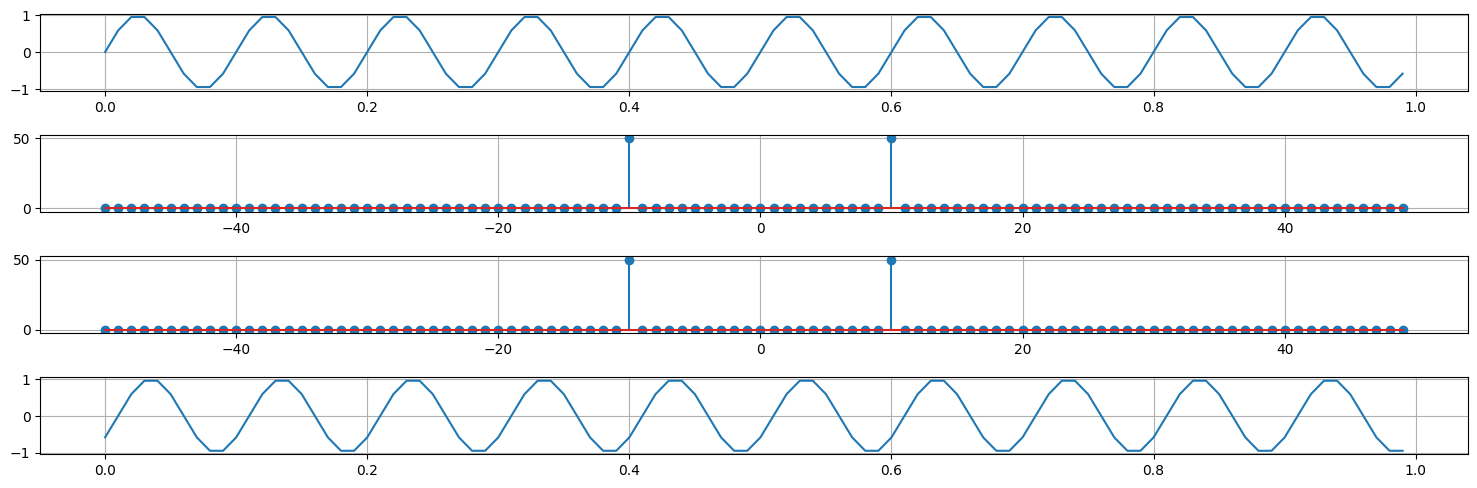

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def productoInterno(a,b):
    return np.sum(np.multiply(a,np.conjugate(b)))

def fourier(x):
    N = len(x)
    coefs = np.zeros(N, dtype=complex)  # vector de coeficientes
    aux1 = -2.0*np.pi/N                 # precalculamos valores que se repiten
    for k in range(N):
        aux2 = aux1*k                   # precalculamos (otros) valores que se repiten
        for n in range(N):
            coefs[k] += x[n]*np.exp(1j*aux2*n)
    return coefs

def retardar(X,t_0):
    N = len(X)
    Xret = np.zeros(N, dtype=complex)
    aux = -1j*2*np.pi*t_0/N
    for k in range(N):
        Xret[k] = X[k]*np.exp(aux*k)
    return Xret

def senoidal(t,fs,fase=0):
    return np.sin(2*np.pi*fs*t+fase)

def reconstruir(X):
    N = len(X)
    x = np.zeros(N)
    aux1 = 1j*2*np.pi/N
    for n in range(N):
        aux2 = aux1*n
        for k in range(N):
            x[n] += X[k]*np.exp(aux2*k)
    return np.divide(x,N)

# Parametros
Tini = 0
Tfin = 1
fm = 100
fs = 10

# Generar senial
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
x = senoidal(t,fs)

# Calcular DFT
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2),N):
    f[k] = f[k]-fm
X = fourier(x)

# Retardar
t_0 = 1
Xret = retardar(X,t_0)
xret = reconstruir(Xret)

# Graficar
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

ax = [
    plt.subplot2grid((4, 1), (0, 0)),
    plt.subplot2grid((4, 1), (1, 0)),
    plt.subplot2grid((4, 1), (2, 0)),
    plt.subplot2grid((4, 1), (3, 0))
]
fig.tight_layout()

for a in ax:
    a.grid()

ax[0].plot(t,x)
ax[1].stem(f,np.abs(X))
ax[2].stem(f,np.abs(Xret))
ax[3].plot(t,xret)